# Inventory Control
Inventory control problems are nice examples of the use the dynamic programming 
algorithm in the context of optimal control problems with discrete input and 
output spaces. Here we consider a deterministic version of the problem (demand 
is known) and a finite-horizon.

Suppose that we wish to control the inventory (number of items) of a given 
product over $h \in \mathbb{N}$ stages/time steps. The number of items is 
described by

$$ x_{k+1} = \max\{x_k+u_k-d_k,0\}, \ \ \ k \in \{0,\dots,h-1\},$$

where $x_k \in \{0,\dots, N\}$, $u_k \in \{0,\dots,N-x_k\}$, $d_k \in 
\mathbb{N} \cup \{0\}$denote the number of items, the supply and the demand 
at time $k$, respectively, and $N$ is the capacity. The demand is known. 
The objective is to find supplies that minimize the cost

$$ \sum_{k=0}^{h-1}  \big(c_1(x_k)+c_2(u_k) -p\min\{x_k+u_k,d_k\}\big)+ 
g_h(x_h),$$

where $c_1(i) = c_{\text{stor}}i$, $ i\in \{0,\dots,N\},$ is the storage 
cost, 

$$c_2(j) =  c_{\text{item}}j+c_{\text{trans}} \text{ if }j>0 ,$$

and

$$ c_2(j) =  0\text{ if }j=0 ,$$

is the cost of ordering $j$ items, $c_{\text{item}}$ is the cost per item 
and $c_{\text{trans}}$ is the transportation cost.  Moreover, $p$ is the 
selling price per item, and $g_h(i)$, $ i\in \{0,\dots,N\}$, is the terminal 
cost.

This live script finds the optimal policy for such a problem. The parameters 
that fully characterize such an inventory control problem are:

* $p$, $c_{\text{stor}}$, $c_{\text{item}}$, $c_{\text{trans}}$;
* the demands, which we represent in a vector, $d =[d_0\ \  d_1 \ \ \dots 
\ \ d_{h-1} ]$; 
* the terminal cost, which we represent in a vector $g_h = [g_h(0) \dots 
g_h(N)]$. 

An example is given next.

In [ ]:
import numpy as np

In [ ]:
# See Live Script 'Dynamic programming algorithm for problems with finite input and state spaces' 
# for an explanation of this function
def dptv(M,C,T):
    h = len(M)
    J_ = np.empty((h+1, 0)).tolist()
    J = np.empty((h, 0)).tolist()
    u = np.empty((h, 0)).tolist()
    for l in range(len(T)):
        J_[h].append(T[l])

    for k in range(h)[::-1]:
        ni = len(M[k]) # state dimension
        for i in range(ni):
            nj = len(M[k][i])
            caux = np.zeros(nj)
            for j in range(nj):
                caux[j] = C[k][i][j] + J_[k+1][M[k][i][j]-1]

            b = np.argsort(caux)
            a = caux[b]
            J_[k].append(a[0])
            J[k].append(J_[k][i])
            u[k].append([b[0]+1])
            for ell in range(1,len(a)):
                if np.isinf(a[ell]) or np.isinf(a[0]):
                    break
                if abs(a[ell] - a[0]) < 1e-8:
                    u[k][i].append(b[ell]+1)
                else:
                    break

    return u, J

In [ ]:
def inventorycontrol(p, citem, ctrans, cstor, d, gh):
    # This simply writes the problem in the format of
    #    'Dynamic programming algorithm for problems with finite input and state spaces'
    # and call the function dptv which is explained there
    
    N_1 = len(gh) #N+1
    h   = len(d)
    DM  = [[] for _ in range(h)]
    CM  = [[] for _ in range(h)]

    for k in range(0, h): #0:h-1
        DM[k] = [[] for _ in range(N_1)]
        CM[k] = [[] for _ in range(N_1)]
        for i in range(0, N_1): #0:N
            x_range = N_1 - 1 - i
            DM[k][i] = [[] for _ in range(x_range + 1)]
            CM[k][i] = [[] for _ in range(x_range + 1)]
            for j in range (0, x_range + 1): #0:N-x
                i_1 = max(i + j - d[k], 0) + 1
                DM[k][i][j] = i_1
                c2 = citem * j
                if j > 0:
                    c2 = c2 + ctrans
                c1 = i * cstor
                CM[k][i][j] = -(min(d[k], j + i) * p - (c1+c2))

    u, J = dptv(DM, CM, gh)

    return u, J

In [ ]:
p = 10
citem = 5
ctrans = 0.5
cstor = 0.2
d = np.array([2, 2, 1, 1])
h = 4
gh = -np.array([0, 4.8, 9.6, 14.4, 19.2])

[u, J] = inventorycontrol(p, citem, ctrans, cstor, d, gh)

In [ ]:
u

In [ ]:
J

The result, i.e., the optimal policy and the costs-to-go are depicted in Figure 2 (costs-to-go on top, and optimal policy specified by the arrows).

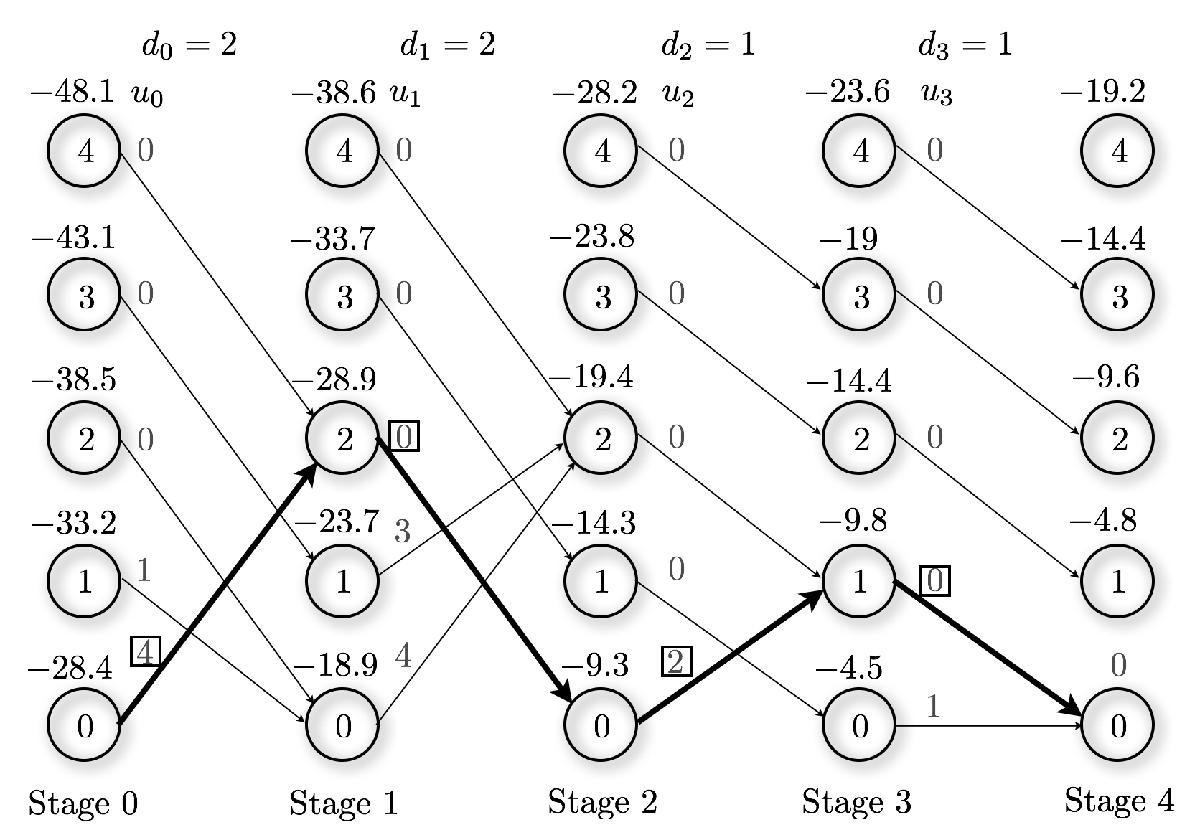

<center>Figure 2: Optimal policy and costs-to-go</center>